In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
def split(array, nrows, ncols):
    """Split a matrix into sub-matrices."""
    r, h = array.shape
    return (array.reshape(h//nrows, nrows, -1, ncols).swapaxes(1, 2).reshape(-1, nrows, ncols))

In [3]:
images_path = r"C:\Users\a_gadari\OneDrive - UNCG\Documents\bdml\images"

In [4]:
im = cv2.imread(os.path.join(images_path,'20180828_110013_R_OPT_512x1024x128_ILM_Enface_Avg_IMG_JPG.jpg'),cv2.IMREAD_UNCHANGED)

In [32]:

i=0
hfin = np.dstack((im[i:i+8,:],im[i:i+8,:],im[i:i+8,:]))
temp    = np.dstack(([255]*512,[0]*512,[0]*512))
for i in range(8,512,8):
    temp1   = np.dstack((im[i:i+8,:],im[i:i+8,:],im[i:i+8,:]))
    hfin    = np.vstack((hfin,temp,temp1))



In [52]:
hsp = np.hsplit(hfin,512//8)
fin =  hsp[0]
temp    = np.dstack(([255]*575,[0]*575,[0]*575)).reshape(575,1,3)
for i in range(1,len(hsp)):
    fin = np.hstack((fin,temp,hsp[i]))



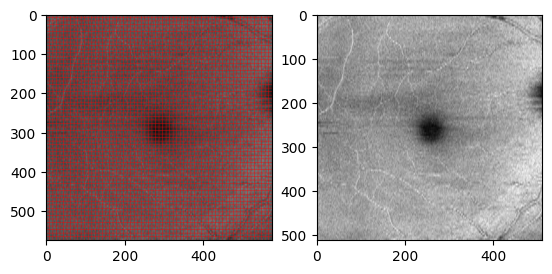

In [59]:
fig,ax = plt.subplots(1,2)
ax[0].imshow(fin)
ax[1].imshow(im,cmap='gray')
plt.show()

Spliting the image into square blocks of 8x8 - Non overlapping; because statistically at least 30 observations are 
considered as significant number of observations
8x8 has 64 which is greater than 30

In [5]:
blocks = split(im[:256,:256],8,8)

In [7]:
labels = []
for i in range(blocks.shape[0]):
    cv2.imshow('part',blocks[i,:,:])
    cv2.waitKey(0)
    labels.append(input('Label:'))

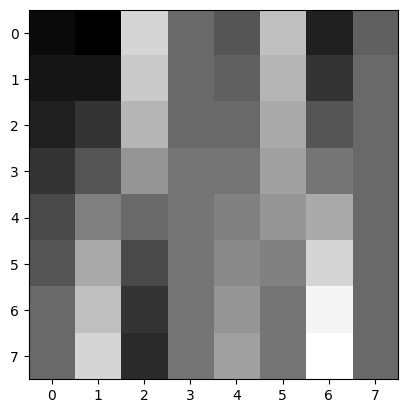

In [8]:
plt.imshow(blocks[1,:,:],cmap='gray')

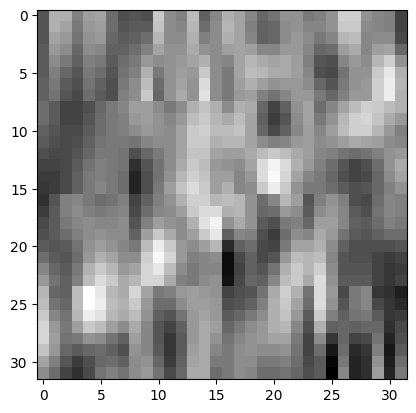

In [9]:
plt.imshow(im[:32,:32],cmap='gray')